##  Multisensory integration in Autistic individuals.

Autism Spectrum Disorder **(ASD)** is a group of developmental disorders that manifests as deficits in social interaction and communication. However, it we do not know if ASD individuals show deficits in perceiving sensory stimuli.  

Deficits in sensory perception can manifest in two ways. First, ASD individuals may not be able to perceive sensory stimuli (e.g., vision, audio, touch) as well as neurologically-intact (control) individuals.  

Second, ASD individuals may not be able to combine different pieces of sensory information as well as their control counterparts. For e.g., when control individuals see a flash of light and hear a beep near it, they combine both pieces of information to improve how well they localize the stimuli. This improvement in the presence of visual and auditory stimuli manifests as increased precision (i.e., sensitivity, inverse threshold) . In fact, threshold in the presence of both flash and beep can be predicted by a Bayesian model. 


$$ \sigma_{com}^2 = \frac{\sigma_{vis}^2 \sigma_{aud}^2} {\sigma_{vis}^2 + \sigma_{aud}^2}$$

$\sigma_{vis}$ and $\sigma_{aud}$ represent the threshold of subject's performance when flash and beep are presented alone, respectively.


It is not clear if the precision with which ASD individuals localize the position of flash and beep follows the predictions of the Bayesian model.

The data presented here was collected from behavioral experiments in ASD and control subjects. Subjects viewed a flash, or heard a beep or viewed flash/heard a beep at the same time. Subjects indicated if the stimlus (stimuli) was to the left or right of straight-ahead. The flash can be small, medium or large-sized. Smaller the flash, easier it is to determine if it is to th left or right. Therefore, small flash --> high reliability, and large flash --> low reliability.

I explore the data of ASD and control individuals to answer these two questions:
(1) Do ASD subjects perceive flash or beep differently? That is, are thresholds (estimated by fitting cumulative gaussian functions to subject's binary responses) similar between the groups? 

(2) Do ASD subjects combine flash and beep as per Bayesian model predictions? That is, do thresholds empirically measured when flash and beep are presented together match the predictions of Bayesian model?

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the ASD data file.

asd_df = pd.read_excel('AV_Cue_Integration.xlsx', sheet_name = 'ASD')

# Reading the control data file.

control_df = pd.read_excel('AV_Cue_Integration.xlsx', sheet_name = 'Control')

## 1. Examining single-cue visual and auditory thresholds between groups. 

### 1.1.1. Viewing auditory discrimination threshold in ASD group.

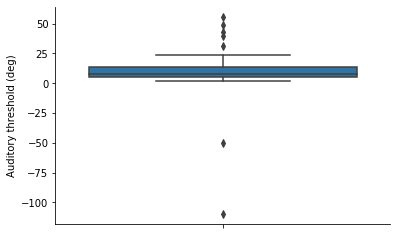

In [4]:
# Plotting auditory thresholds in the ASD group.

sns.set_style()

ax = sns.boxplot(y = 'aud_thr', data = asd_df)

sns.set_context('notebook',font_scale= 1)

ax.set_ylabel('Auditory threshold (deg)')

sns.despine()

### There are clear outliers in the ASD group. Threshold (i.e., smallest change in the location of the beep that the subject can detect) cannot be negative as it is the slope of a cumulative Gaussian function.  Thus, some ASD subjects are not able to localize the position of the auditory stimulus.  

### 1.1.2. Detecing and replacing the outliers in the ASD group.

In [5]:
# Based on prior information about the experimental stimulus, we know that the largest
# distance of the beep from the center is 9 deg (to the left and right). 
# Thus, auditory threshold cannot be greater than 18 deg.

aud_outlier = 18



In [6]:
# Finding outliers in the ASD group and replacing them with NaN.

asd_df.loc[asd_df['aud_thr'].abs() > aud_outlier, 'aud_thr'] = np.NaN


### 1.1.3. Visualizing the visual thresholds (flash-related) in ASD group.

Text(0.5, 1.0, 'Low reliability')

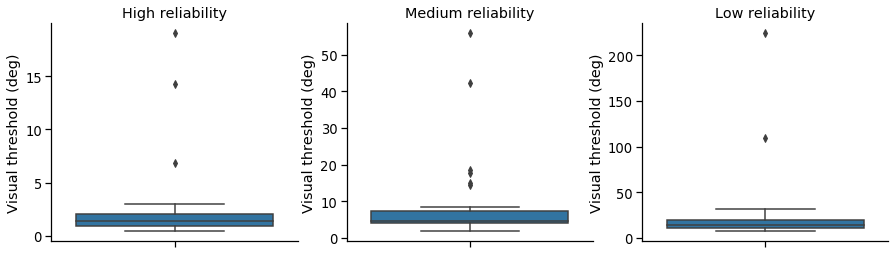

In [7]:
plt.subplots(1,3, figsize = (15,4))
sns.set_context('notebook',font_scale = 1.2)

plt.subplot(1,3,1)
sns.boxplot(y='vishigh_thr',data = asd_df)
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('High reliability')


plt.subplot(1,3,2)
sns.boxplot(y='vismed_thr',data=asd_df)
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('Medium reliability')


plt.subplot(1,3,3)
sns.boxplot(y='vislow_thr',data=asd_df)
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('Low reliability')

### The visual thresholds show clear outliers in the ASD group. Thus, even when visual flash was presented alone, some ASD subjects were not able to localize its position. 

### 1.1.4. Replacing the outliers in the visual thresholds in ASD group with NaN values.

In [8]:
# Applying the same outlier detection criteria. 

# Based on the experimental design, the largest distance of a flash from the center was 20 deg (to right and left).

vis_outlier = 40 

asd_df.loc[asd_df['vishigh_thr'] > vis_outlier, 'vishigh_thr'] = np.NaN

asd_df.loc[asd_df['vismed_thr'] > vis_outlier, 'vismed_thr'] = np.NaN

asd_df.loc[asd_df['vislow_thr'] > vis_outlier, 'vislow_thr'] = np.NaN

### 1.2.1 - 1.2.2.  Visualizing auditory thresholds in the control group, detecting outliers and replacing them with NaN.

Text(0, 0.5, 'Auditory threshold (deg)')

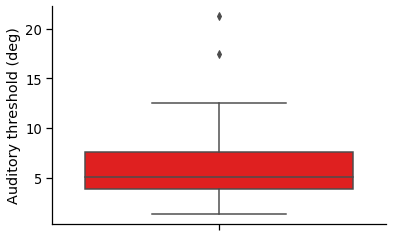

In [9]:
# Visualizing auditory threshold in the control group.

sns.set_style()

ax = sns.boxplot(y = 'aud_thr', data = control_df, color = 'red')

sns.set_context('notebook',font_scale = 1.4)

sns.despine()

ax.set_ylabel('Auditory threshold (deg)')


In [10]:
# Replacing the outlier in the auditory threshold in the control group with NaN.

control_df.loc[control_df['aud_thr'] > aud_outlier,'aud_thr'] = np.NaN

### 1.2.3 - 1.2.4. Displaying visual thresholds in the control group, detecting outliers and replacing them with NaN.

Text(0.5, 1.0, 'Low reliability')

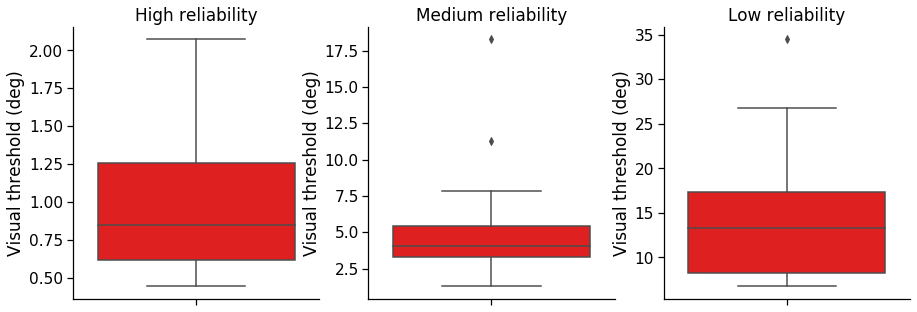

In [11]:
plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(y='vishigh_thr', data = control_df, color='red')
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('High reliability')


plt.subplot(1,3,2)
sns.boxplot(y='vismed_thr', data = control_df, color='red')
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('Medium reliability')


plt.subplot(1,3,3)
sns.boxplot(y='vislow_thr', data = control_df, color='red')
sns.despine()
plt.ylabel('Visual threshold (deg)')
plt.title('Low reliability')


In [12]:
# Replacing the outliers in each reliability level of the visual thresold
# applying the same criteria as that was applied to the ASD group.

control_df.loc[control_df['vishigh_thr'] > vis_outlier, 'vishigh_thr'] = np.NaN

control_df.loc[control_df['vismed_thr'] > vis_outlier, 'vismed_thr'] = np.NaN

control_df.loc[control_df['vislow_thr'] > vis_outlier, 'vislow_thr'] = np.NaN

### 1.3. Are single-cue auditory thresholds different between ASD and control groups?

Auditory threshold in ASD group not significantly different from the control group: t = 1.326, p = 0.19


Text(1.3, 10, 't = 1.33, p-value = 0.19')

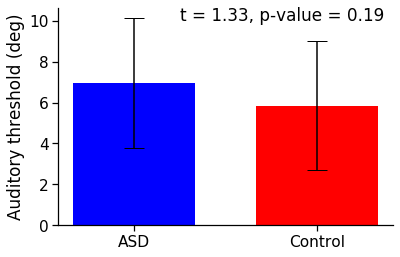

In [15]:
from scipy import stats

plt.bar(1, asd_df['aud_thr'].mean(), color = 'blue', yerr=asd_df['aud_thr'].std(),capsize=10)

plt.bar(2.2, control_df['aud_thr'].mean(), color = 'red',yerr=control_df['aud_thr'].std(), capsize=10)

plt.xticks((1,2.2),('ASD','Control'))

plt.ylabel('Auditory threshold (deg)')

sns.despine()

statistic, p_value = stats.ttest_ind(asd_df['aud_thr'], control_df['aud_thr'], axis=0, equal_var= False, nan_policy = 'omit')

add_text = 't = ' + str(round(statistic,2)) + ', p-value = ' + str(round(p_value,2))

plt.text(1.3, 10, add_text)


#### Considering subjects who were able to localize beep sounds, auditory threshold in the ASD group was not significantly different from the control group. 

### 1.4. Are visual thresholds different between ASD and control groups?

In [16]:
# Formatting the asd_df and control_df for statistical comparison.

# Assigning "high relaibility" viusla condition a label = 1.
asd_vishigh = np.array(asd_df[['group','subj','vishigh_thr']])
label_asdhigh = np.ones((asd_vishigh.shape[0],1))
np.concatenate((asd_vishigh, label_asdhigh),axis=1)

# Assigning "medium reliability" visual condtion label = 2.
asd_vismed = np.array(asd_df[['group','subj','vismed_thr']])
label_asdmed = np.ones((asd_vismed.shape[0],1))*2
np.concatenate([asd_vismed, label_asdmed],axis=1)

# Assigning "low reliability" visual condtion label = 3.
asd_vislow = asd_df[['group','subj','vislow_thr']]
label_asdlow = np.ones((asd_vislow.shape[0],1))*3
np.concatenate([asd_vislow, label_asdlow],axis=1)

asd_visthr = np.concatenate((np.concatenate((asd_vishigh, label_asdhigh),axis=1), np.concatenate([asd_vismed, label_asdmed],axis=1), np.concatenate([asd_vislow, label_asdlow],axis=1)), axis=0)

In [17]:
# Formatting the control group's visual threshold for statistical comparison.

con_vishigh = np.array(control_df[['group','subj','vishigh_thr']])
label_conhigh = np.ones((con_vishigh.shape[0],1))
np.concatenate([con_vishigh, label_conhigh],axis=1)

con_vismed = np.array(control_df[['group','subj','vismed_thr']])
label_conmed = np.ones((con_vismed.shape[0],1))*2
np.concatenate([con_vismed, label_conmed], axis=1)

con_vislow = np.array(control_df[['group','subj','vislow_thr']])
label_conlow = np.ones((con_vislow.shape[0],1))*3
np.concatenate([con_vislow, label_conlow], axis=1)

con_visthr = np.concatenate((np.concatenate([con_vishigh, label_conhigh],axis=1),np.concatenate([con_vismed, label_conmed], axis=1), np.concatenate([con_vislow, label_conlow], axis=1) ), axis=0)

In [18]:
# Creating `vis_thr` with composite data from ASD and control groups.

vis_thr = pd.DataFrame(data = np.concatenate((asd_visthr, con_visthr),axis=0), columns = ['group','subj','visthr','reliability'])

vis_thr.dropna(inplace=True)

vis_thr['visthr'] = vis_thr['visthr'].astype(float)

In [19]:
# Mixed-effects ANOVA comparing if visual thresholds between the ASD and control groups
# are significantly different or not.

import pingouin as pg

aov = pg.mixed_anova(data=vis_thr, dv='visthr', between='group', within='reliability',
                     subject='subj')#, correction=True)

pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2        MS        F    p-unc  p-GG-corr                 np2  eps    sphericity    W-spher    p-spher
-----------  --------  -----  -----  --------  -------  -------  ----------------------  -----  -----  ------------  ---------  ----------------------
group         107.560      1     71   107.560    2.733    0.103  -                       0.037  -      -             -          -
reliability  6275.096      2    142  3137.548  275.396    0.000  1.1385757496649787e-34  0.795  0.676  False         0.52       1.6188161524182987e-10
Interaction    18.427      2    142     9.214    0.809    0.447  -                       0.011  -      -             -          -



In [ ]:
# Plotting visual thresholds for each group as a function of visual cue reliability.

ax = sns.pointplot(data=vis_thr, x='reliability', y = 'visthr', hue='group', errwidth=2, capsize=0.1)
sns.set_style()

h,l = ax.get_legend_handles_labels()

ax.legend(handles = h, labels=['ASD','Control'],edgecolor='white' )

sns.set_context('notebook',font_scale=1.4)

sns.despine()

ax.set_ylabel('Visual discrimination threshold (deg)')

ax.set_xticklabels(labels=['High','Medium','Low'])
ax.set_xlabel('Visual cue reliability')

print('The visual thresholds in the ASD group are not statistically different from the control group')


## Answer 1: Overall, ASD subjects discriminated the location of beep or flash as well as the control subjects. 

#### However, that 27% of ASD subjects  (9 out of 33 ASD subjects) had trouble localizing the position of the auditory stimulus, as opposed to 3% in control subjects (1 out of 40 control subjects).


## Question 2.1: Do ASD subjects integrate flash and beep as well as control subjects? That is, when flash and beep are presented together, does the threshold (i.e., inverse precision) match the Bayesian model predictions? 

**`measthr_high`**, **`measthr_med`** and **`measthr_low`** in the `asd_df` represent the empirically measured threshold when subjects classified the flash and beep stimuli (presented together) to be either to the left or right of straight-ahead. `high`, `medium` and `low` represent the three sizes of the flash which influences the reliability or the noise level of the stimulus. 



In [20]:
# Grouping together measured thresholds and model predictions.

asd_comhigh = np.concatenate((asd_df[['group','measthr_high','predthr_high']],np.ones((asd_df.shape[0],1)) ), axis=1)

asd_commed = np.concatenate((asd_df[['group','measthr_med','predthr_med']],2*np.ones((asd_df.shape[0],1)) ), axis=1)

asd_comlow = np.concatenate((asd_df[['group','measthr_low','predthr_low']],3*np.ones((asd_df.shape[0], 1)) ), axis = 1)

asd_meas_pred = pd.DataFrame(np.concatenate((asd_comhigh,asd_commed,asd_comlow), axis=0), columns =['group','meas_thr','pred_thr','rel'])

filt = asd_meas_pred['meas_thr'] > 0
asd_meas_pred = asd_meas_pred.loc[filt, :]


95% confidence interval on the slope is [-0.9118166677479593, 3.0581519551155782]


Slope between measured and predicted values not different from 1 as 95% CI contains 1




Text(0.5, 1.0, 'ASD subjects')

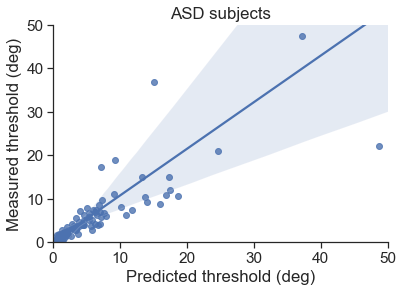

In [21]:
# Computing linear regression between measured thresholds and model predictions for the ASD group.

from scipy.stats import linregress, t

y = np.array(pd.to_numeric(asd_meas_pred['meas_thr']))
x = np.array(pd.to_numeric(asd_meas_pred['pred_thr']))

# Performing linear regression between measured and predicted threshold for ASD group.
slope, intercept, r_value, p_value, std_err = linregress(x,y)

# Calculating error on the slope estimate to compute 95% confidence interval on the slope.
err_margin = t.ppf(0.975, y.shape[0]-2)

print('95% confidence interval on the slope is [{}, {}]'.format( slope-err_margin, slope+err_margin ))

print('\n')

print('Slope between measured and predicted values not different from 1 as 95% CI contains 1')
print('\n')

# Plot the measured v/s predicted thresholds in the ASD group.
sns.set_style()

sns.set_context(context='notebook', font_scale=1.4)
ax = sns.regplot(x,y)

ax.set_xlim(0,50)

ax.set_ylim(0,50)

sns.despine()
ax.set_xlabel('Predicted threshold (deg)')
ax.set_ylabel('Measured threshold (deg)')
plt.title('ASD subjects')


### Answer 2.1: For ASD subjects, threshnold measured during combined presentation of flash and beep  matched well with the thresholds predicted by the Bayesian model. 



### 2.2. Do control subjects combine flash and beep stimuli in a manner consistent with the Bayesian model predictions? 

In [22]:
# Converting the control_df dataset into an easier format for regression analysis. 

con_high = np.concatenate((control_df[['group','measthr_high','predthr_high']],np.ones((control_df.shape[0],1)) ), axis=1)

con_med = np.concatenate((control_df[['group','measthr_med','predthr_med']], 2*np.ones((control_df.shape[0],1)) ), axis = 1)

con_low = np.concatenate((control_df[['group','measthr_low','predthr_low']],3*np.ones((control_df.shape[0],1)) ),axis=1)

con_meas_pred = pd.DataFrame(np.concatenate((con_high,con_med ,con_low), axis =0), columns=['group','measthr','predthr','rel'])

95% confidence interval on the slope is [-1.0213942201709174, 2.9391502783104944]


Text(0.5, 1.0, 'Control subjects')

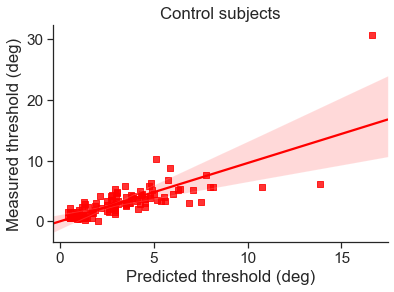

In [23]:
x = pd.to_numeric(con_meas_pred['predthr'])
y = pd.to_numeric(con_meas_pred['measthr'])

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

err_margin = t.ppf(0.975, y.shape[0]-2)

print('95% confidence interval on the slope is [{}, {}]'.format( slope-err_margin, slope+err_margin ))

ax = sns.regplot(x,y,color='red', marker='s')
ax.set_xlabel('Predicted threshold (deg)')
ax.set_ylabel('Measured threshold (deg)')
sns.despine()
sns.set_context('notebook', font_scale=1.4)
plt.title('Control subjects')

### Answer 2.2: In control group, thresholds measured during combined flash/beep presentation matched the model predictions. 

## In summary, ASD subjects do not show impairments when integrating visual (flash) and auditory (beep) cues. However, a greater proportion of ASD subjects show deficits in  localizing the auditory stimulus.